Paarth kapur

# Installing Modules and downloading data

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np  

In [2]:
directory = r'C:\Users\paart\DL_IA'

In [3]:
import os
os.chdir(directory)

In [4]:
directory = ['thermal images']
iml = []
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        iml.append(f)

In [5]:
len(iml)

100

In [6]:
poi=[]
for i in range(len(iml)):
  panel= cv2.cvtColor(cv2.imread(iml[i]), cv2.COLOR_BGR2RGB)
  poi.append(panel)

In [7]:
poi=[]
poi2=[]
for i in range(len(iml)):

    panel= cv2.imread(iml[i])
    panel2 = cv2.cvtColor(cv2.imread(iml[i]),cv2.COLOR_BGR2RGB)
    poi.append(panel)
    poi2.append(panel2)

In [8]:
print(iml)

['thermal images\\FLIR0003.jpg', 'thermal images\\FLIR0004.jpg', 'thermal images\\FLIR0005.jpg', 'thermal images\\FLIR0006.jpg', 'thermal images\\FLIR0007.jpg', 'thermal images\\FLIR0008.jpg', 'thermal images\\FLIR0009.jpg', 'thermal images\\FLIR0010.jpg', 'thermal images\\FLIR0011.jpg', 'thermal images\\FLIR0013.jpg', 'thermal images\\FLIR0014.jpg', 'thermal images\\FLIR0015.jpg', 'thermal images\\FLIR0016.jpg', 'thermal images\\FLIR0017.jpg', 'thermal images\\FLIR0018.jpg', 'thermal images\\FLIR0019.jpg', 'thermal images\\FLIR0020.jpg', 'thermal images\\FLIR0021.jpg', 'thermal images\\FLIR0022.jpg', 'thermal images\\FLIR0023.jpg', 'thermal images\\FLIR0024.jpg', 'thermal images\\FLIR0025.jpg', 'thermal images\\FLIR0026.jpg', 'thermal images\\FLIR0035.jpg', 'thermal images\\FLIR0040.jpg', 'thermal images\\FLIR0049.jpg', 'thermal images\\FLIR0060.jpg', 'thermal images\\FLIR0061.jpg', 'thermal images\\FLIR0062.jpg', 'thermal images\\FLIR0063.jpg', 'thermal images\\FLIR0067.jpg', 'therma

In [9]:
iml[1]

'thermal images\\FLIR0004.jpg'

# Applying a mask to get the faulty region

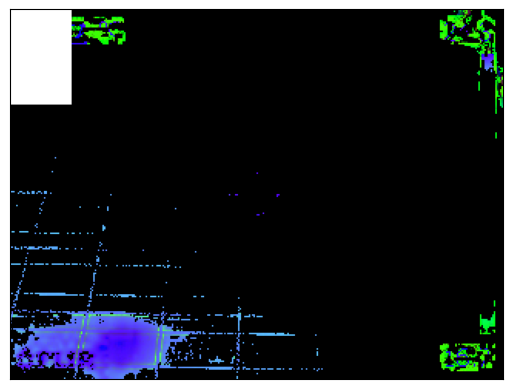

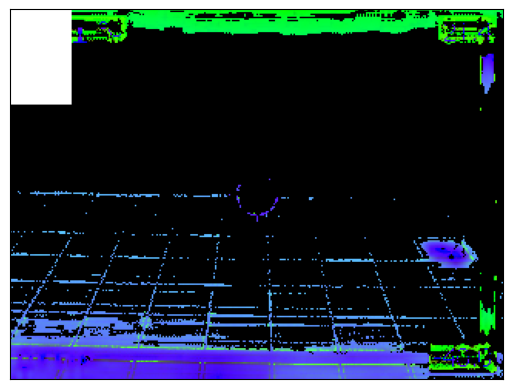

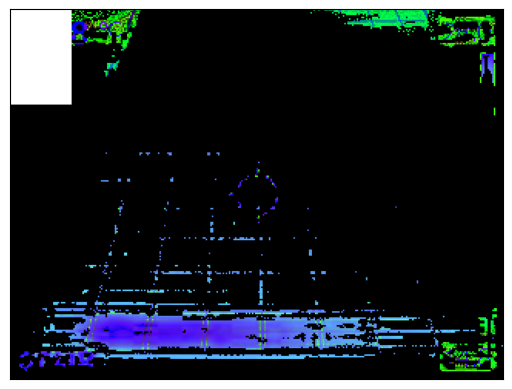

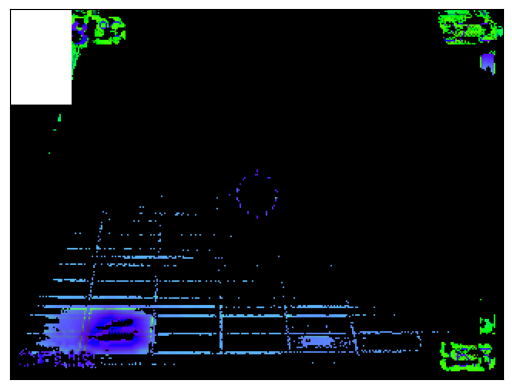

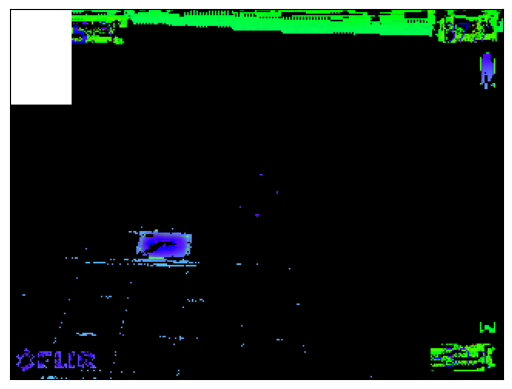

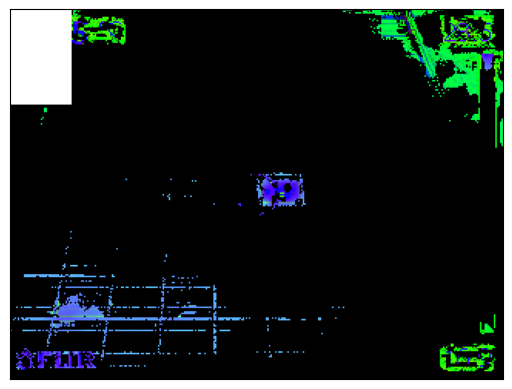

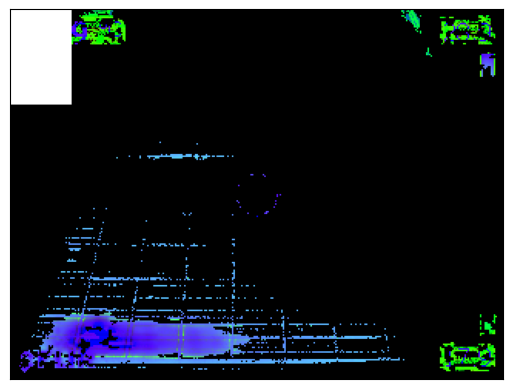

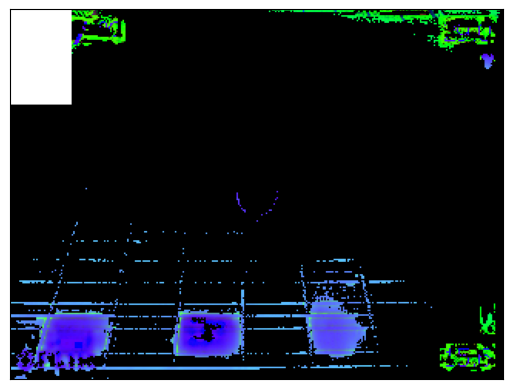

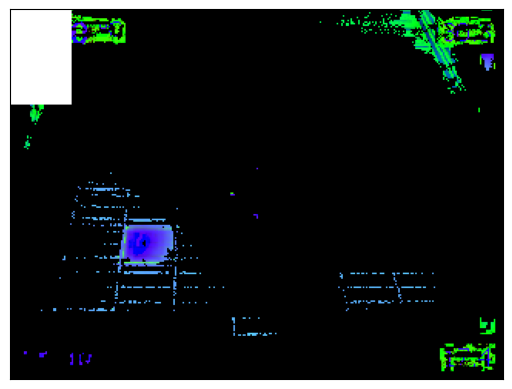

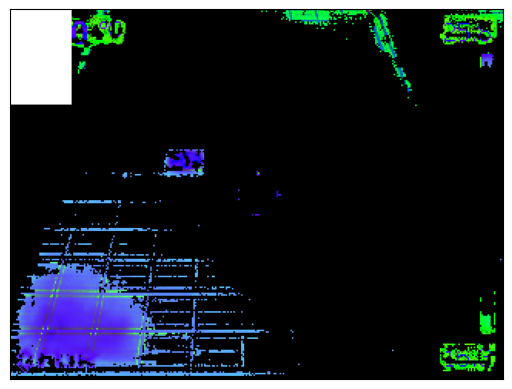

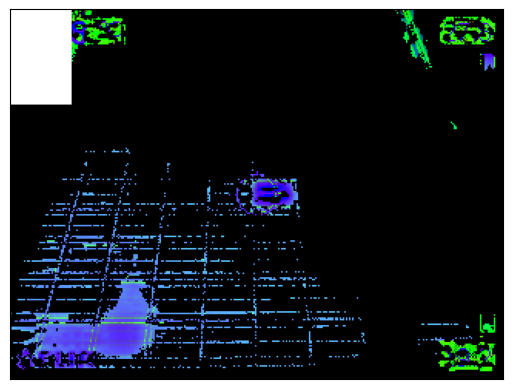

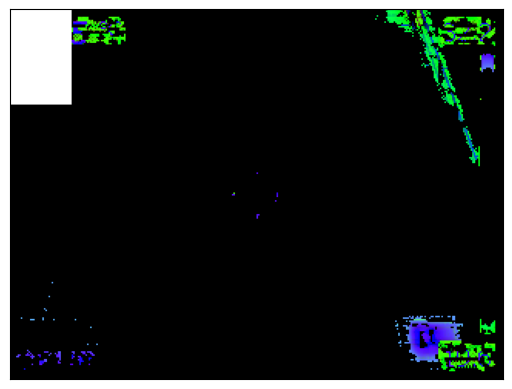

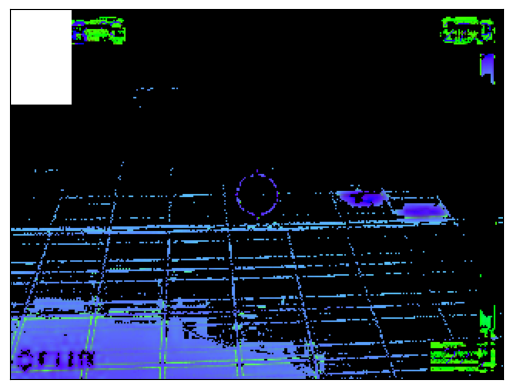

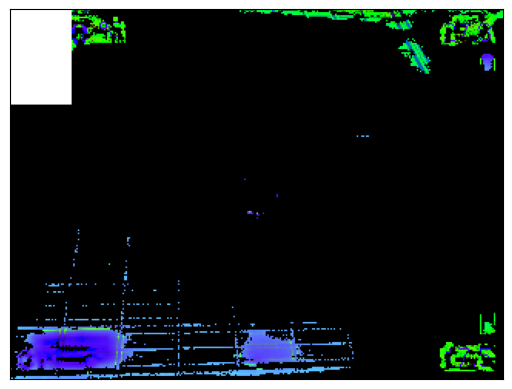

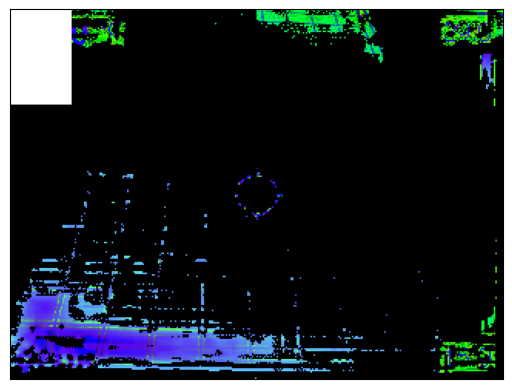

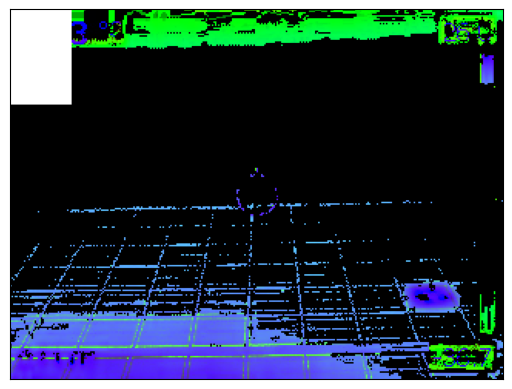

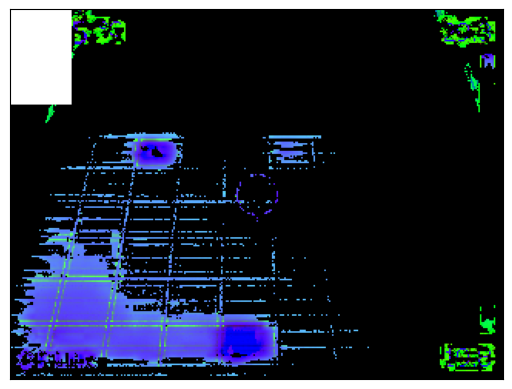

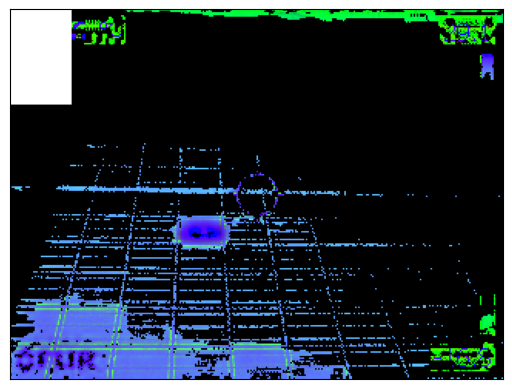

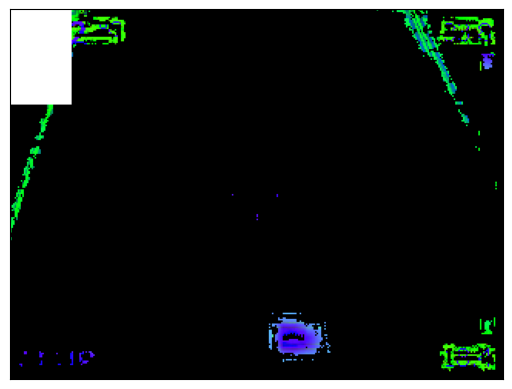

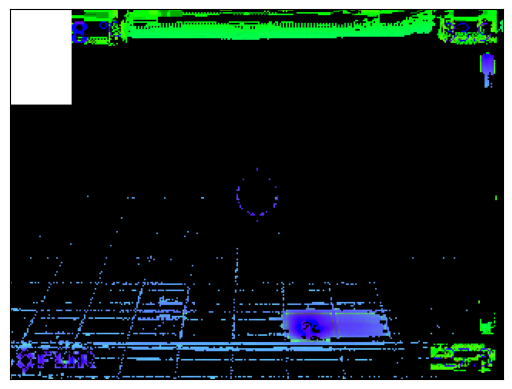

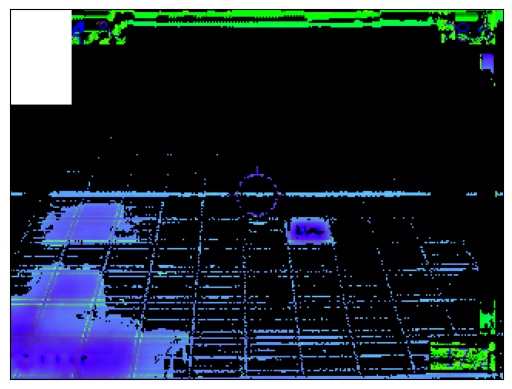

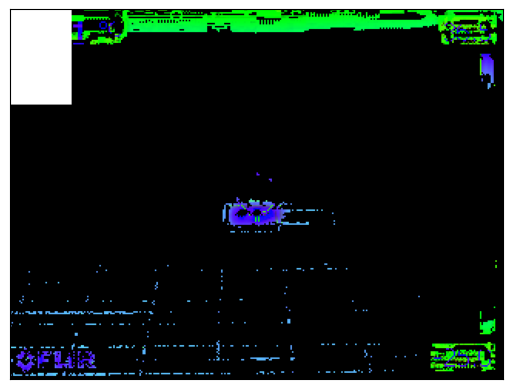

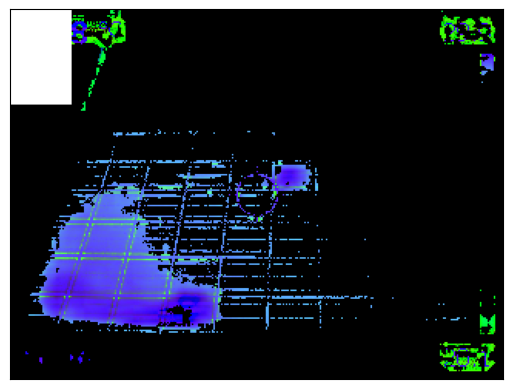

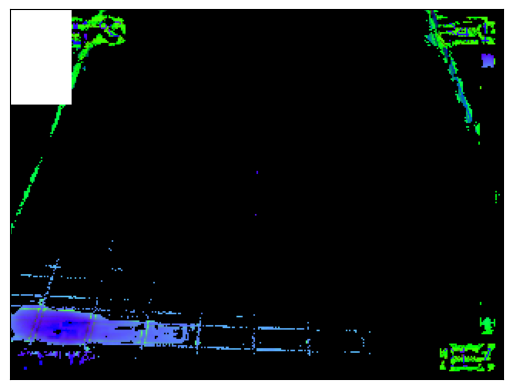

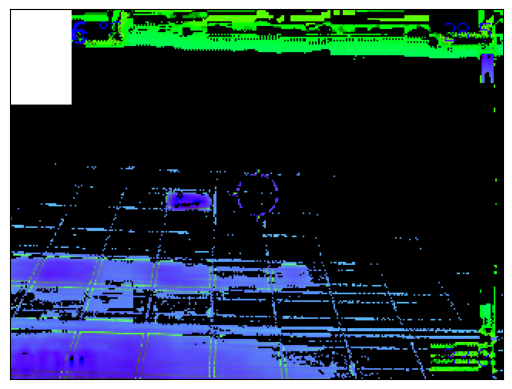

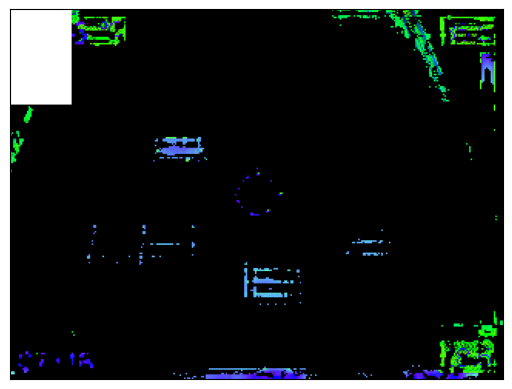

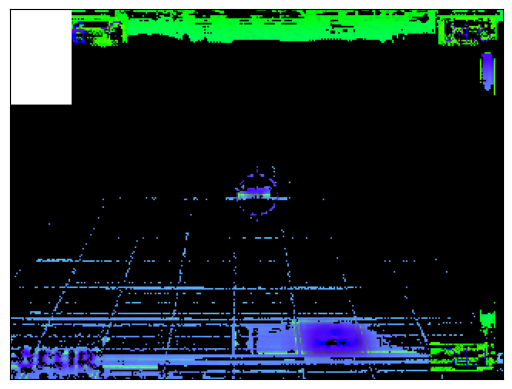

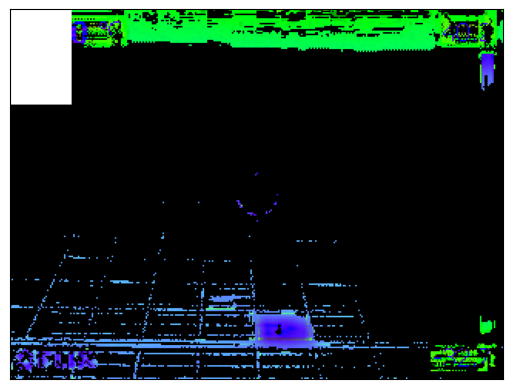

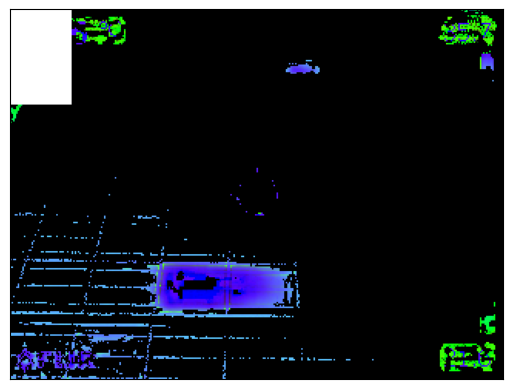

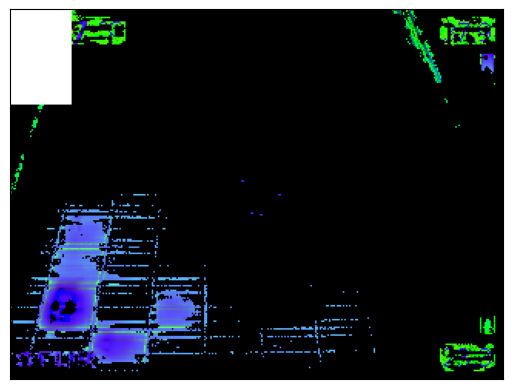

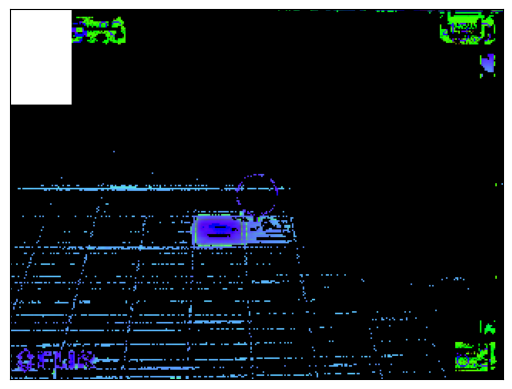

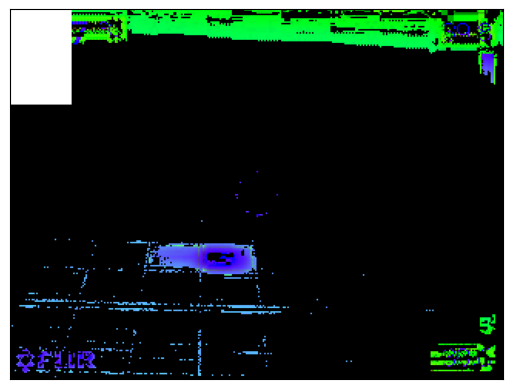

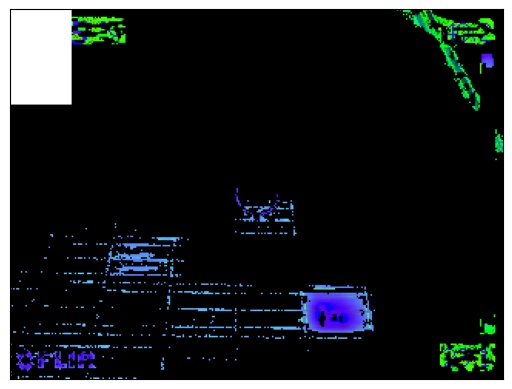

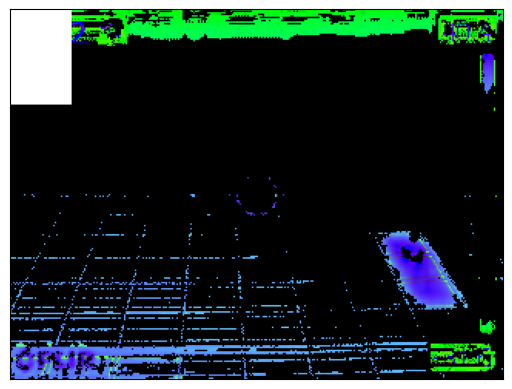

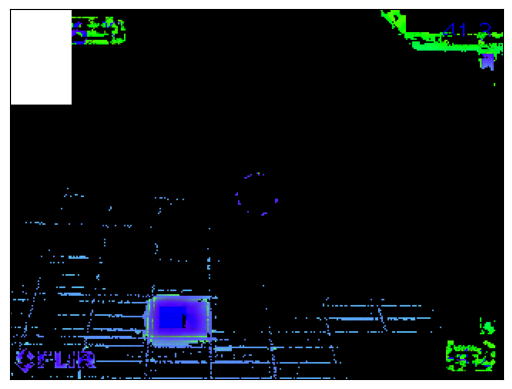

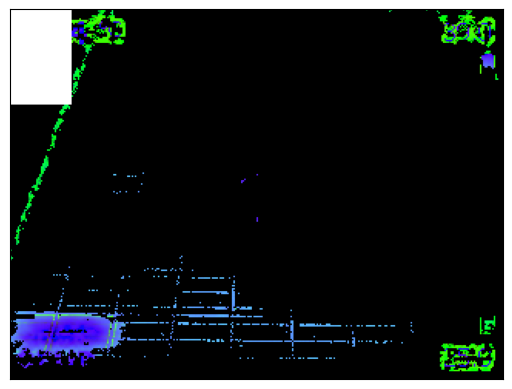

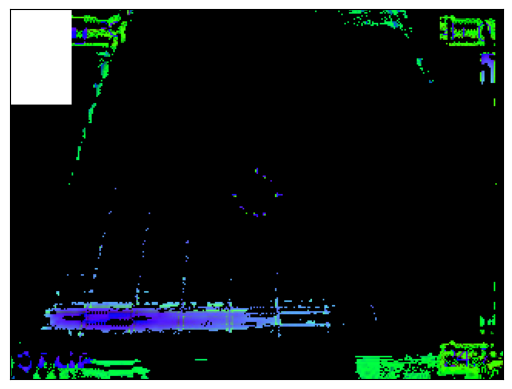

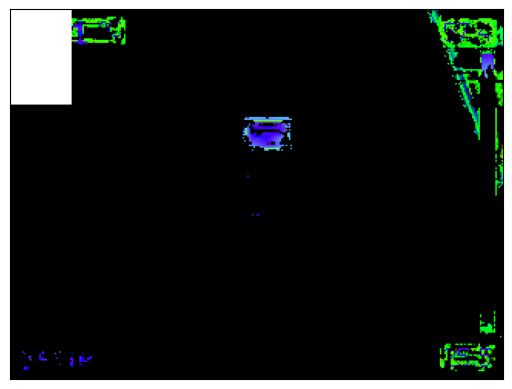

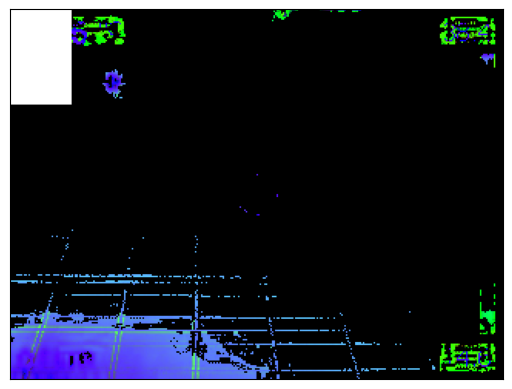

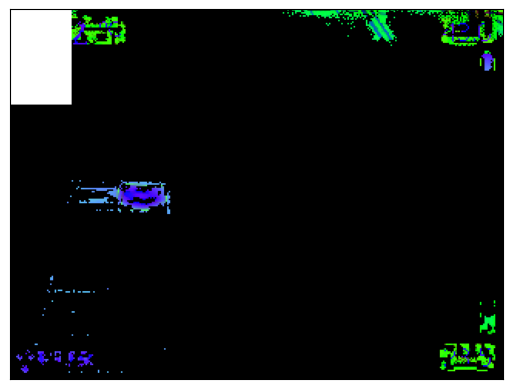

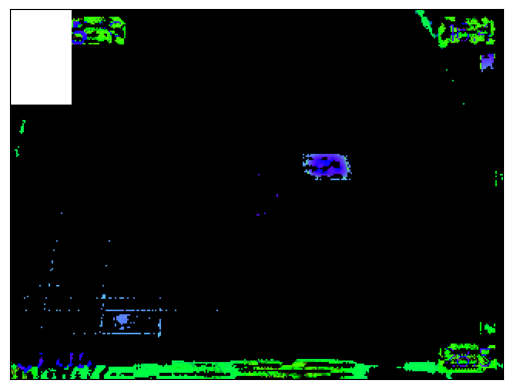

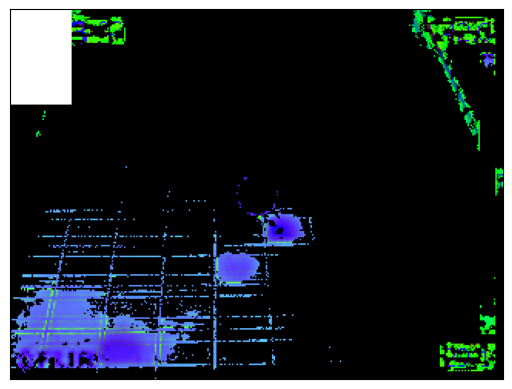

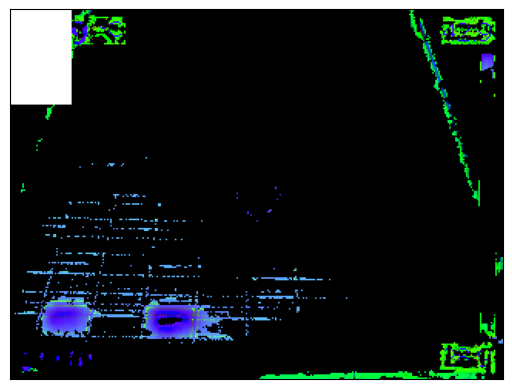

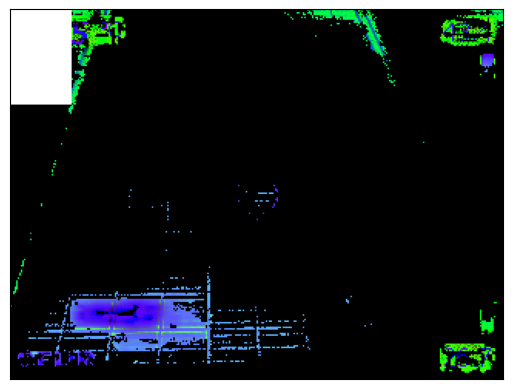

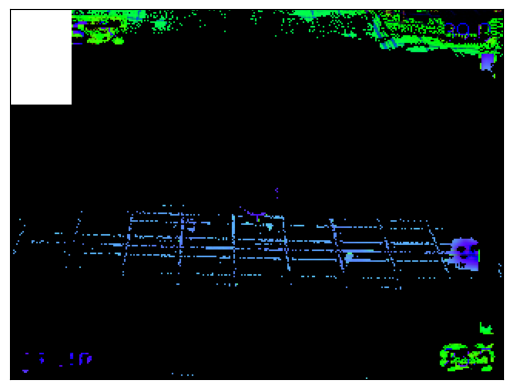

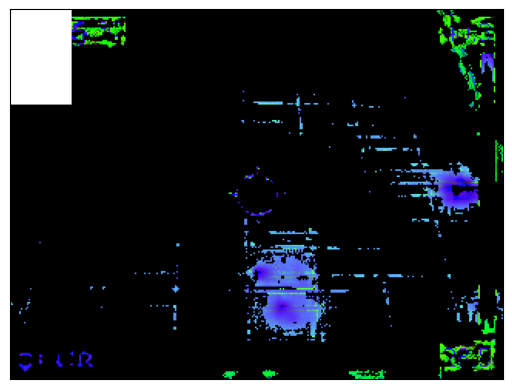

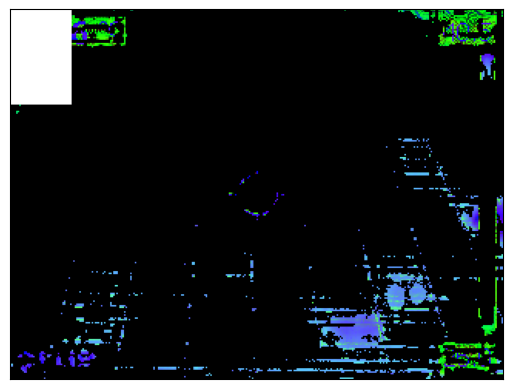

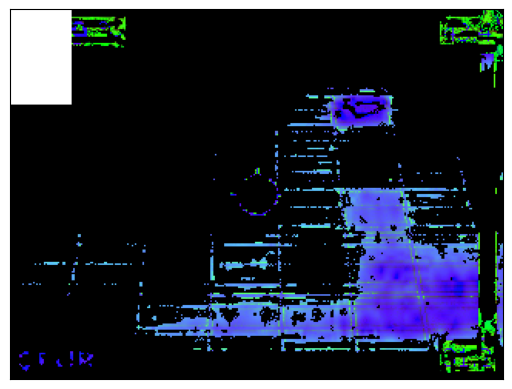

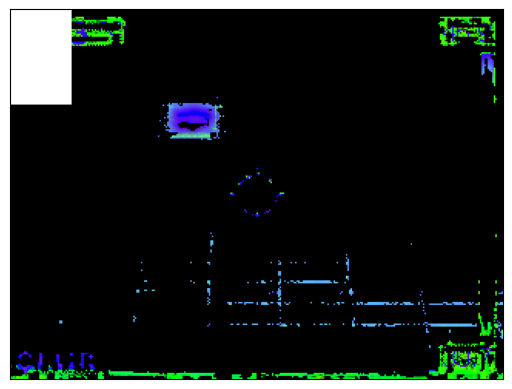

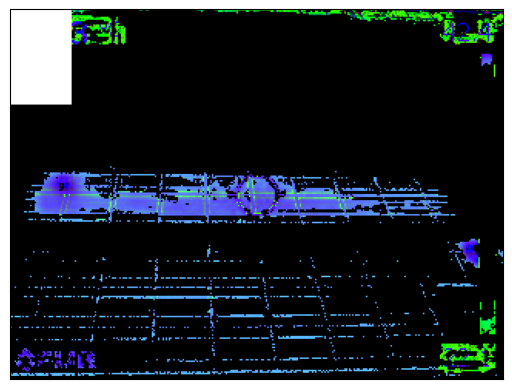

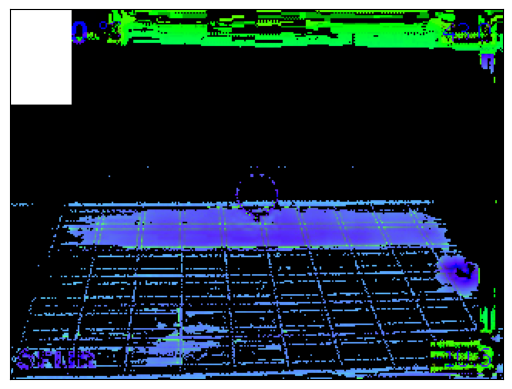

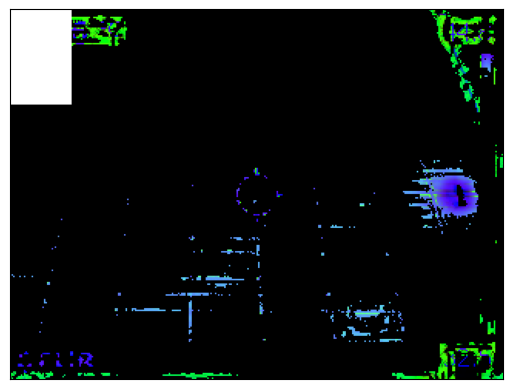

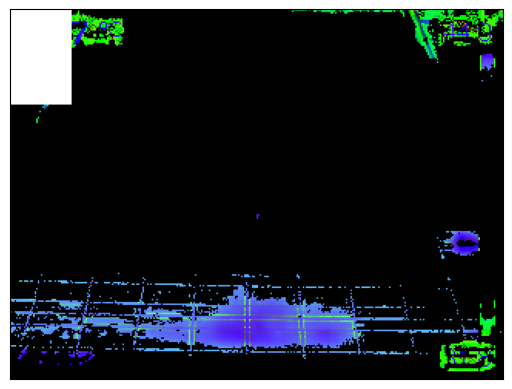

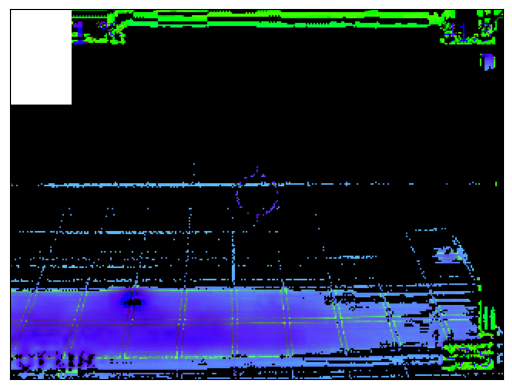

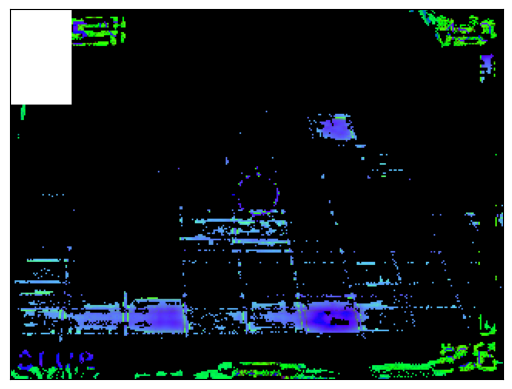

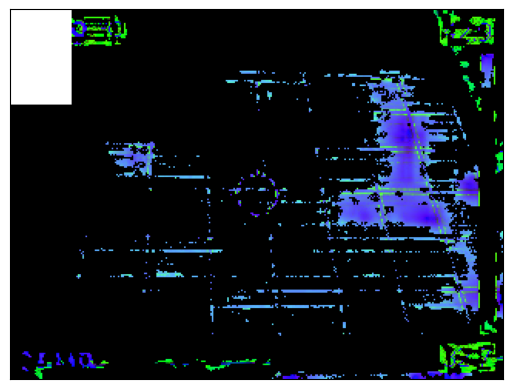

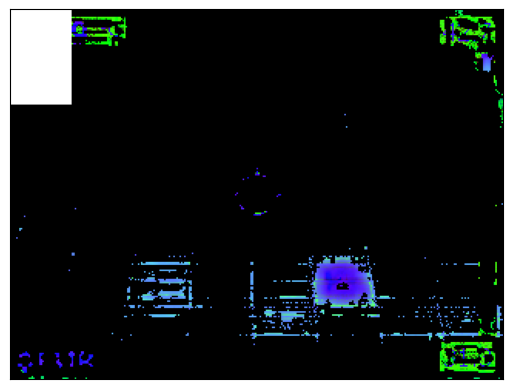

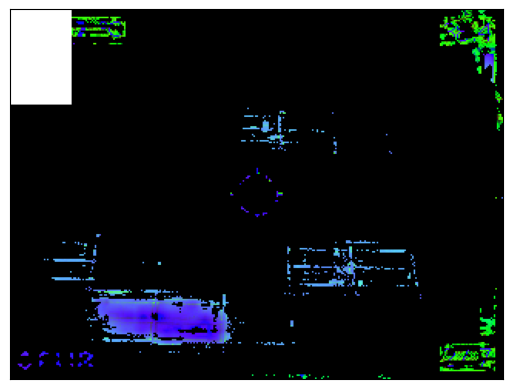

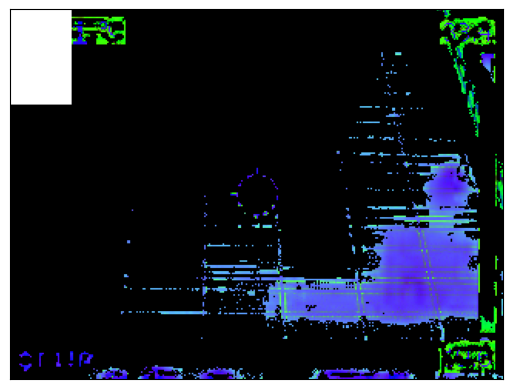

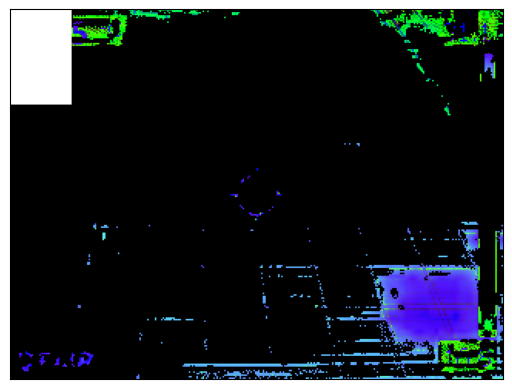

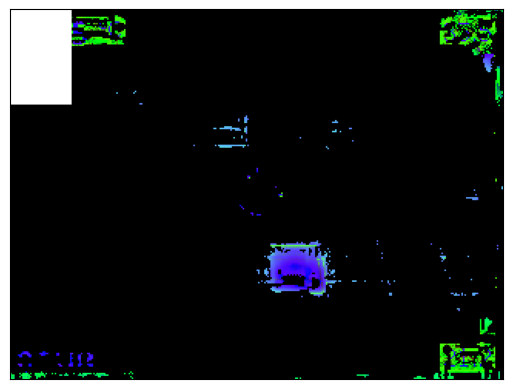

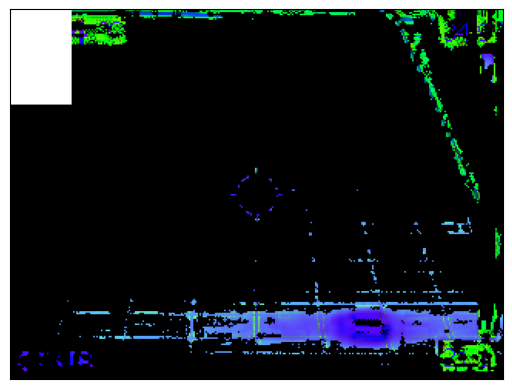

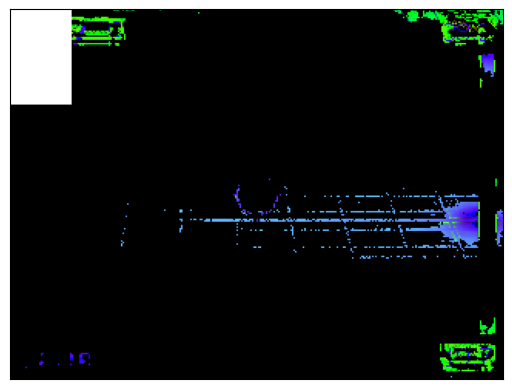

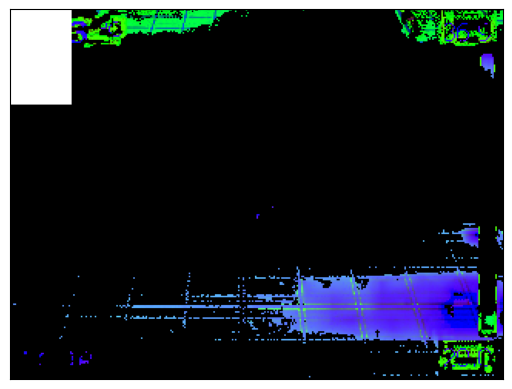

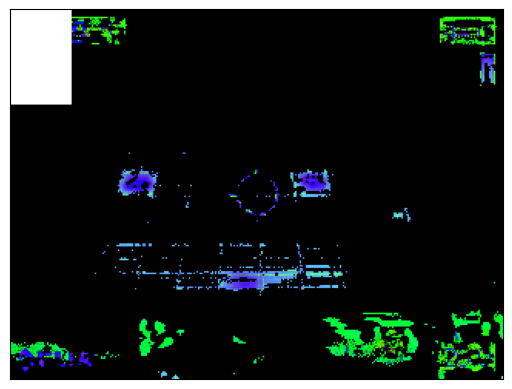

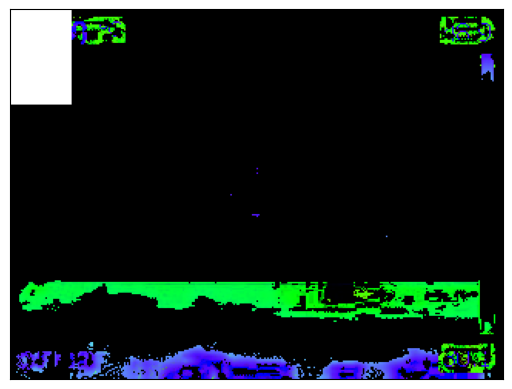

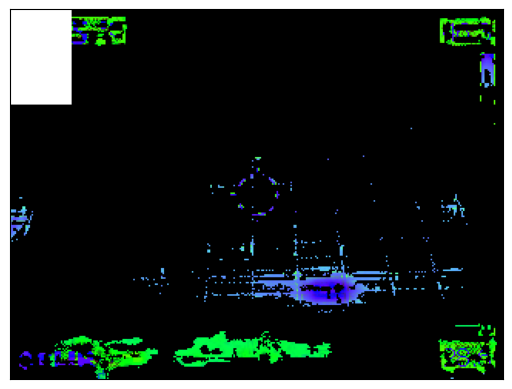

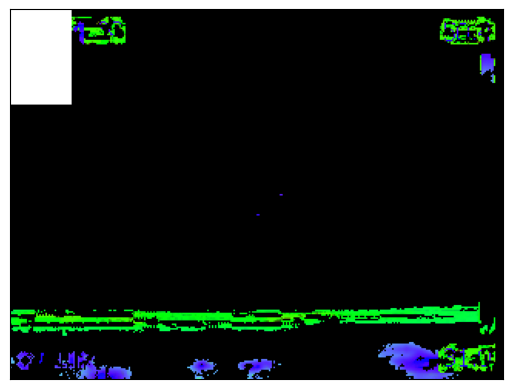

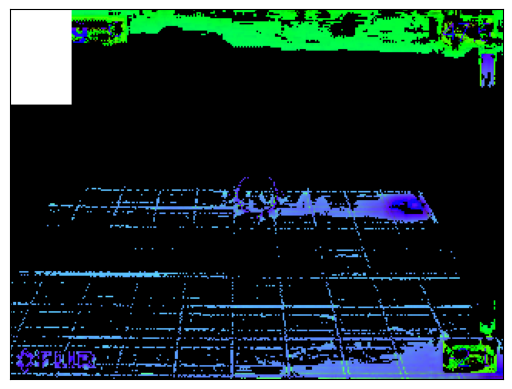

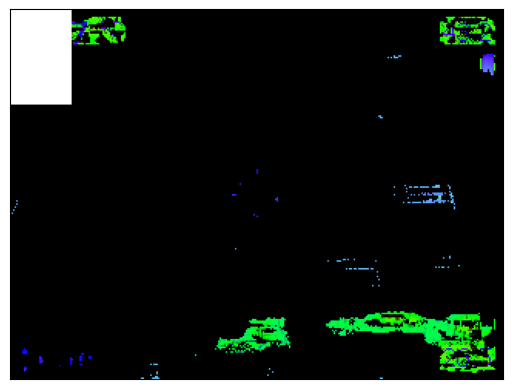

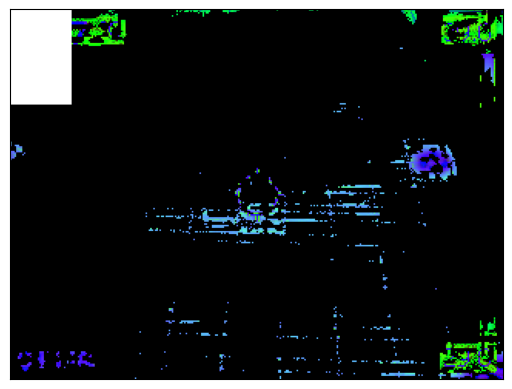

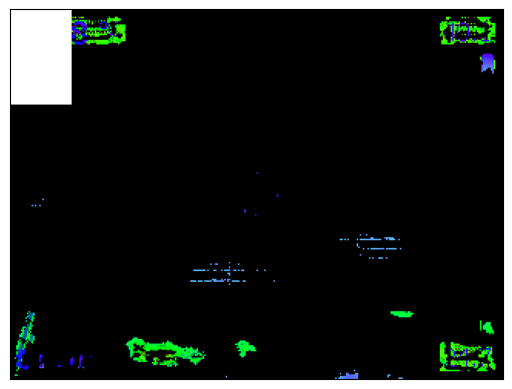

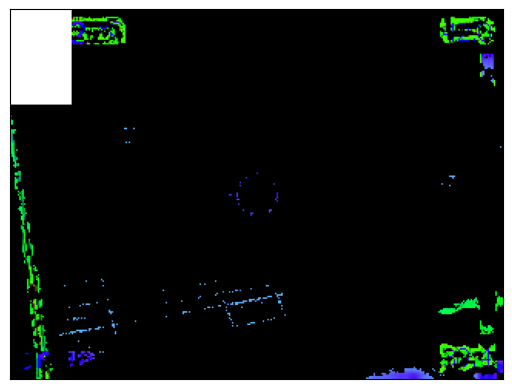

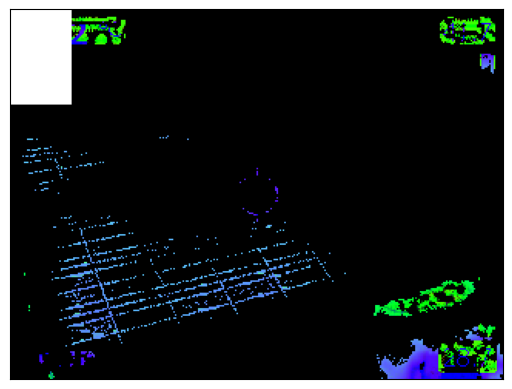

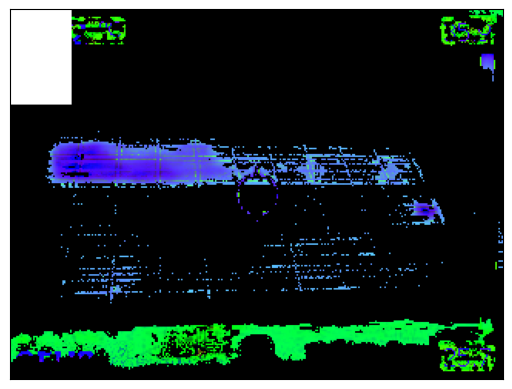

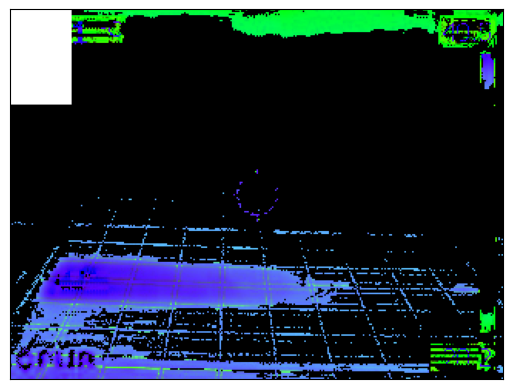

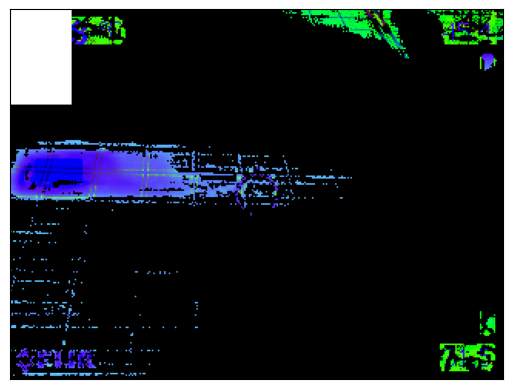

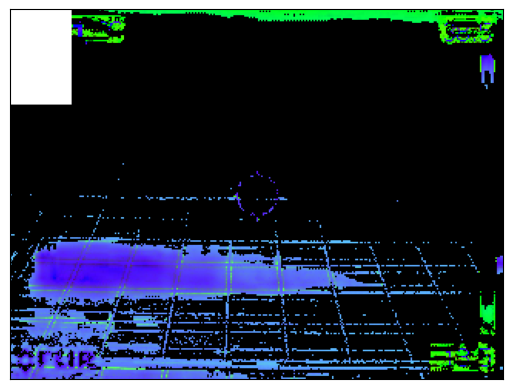

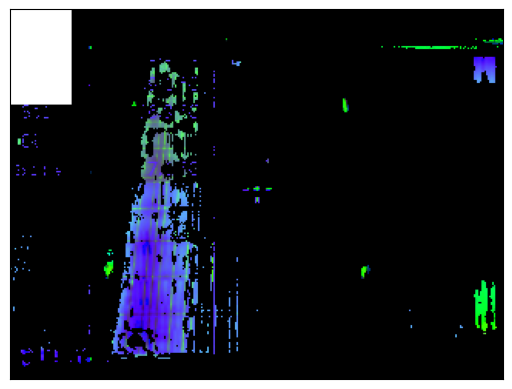

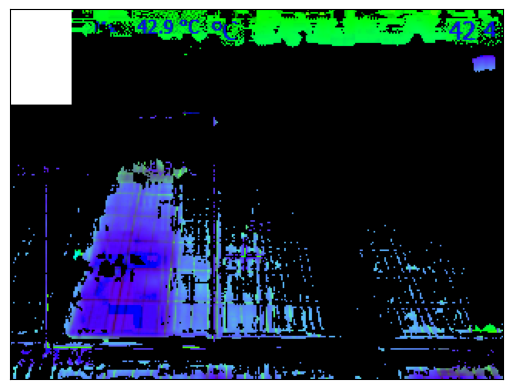

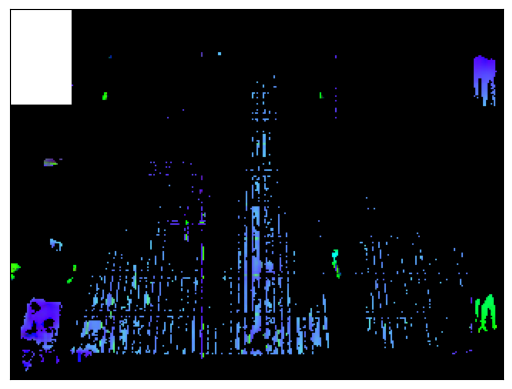

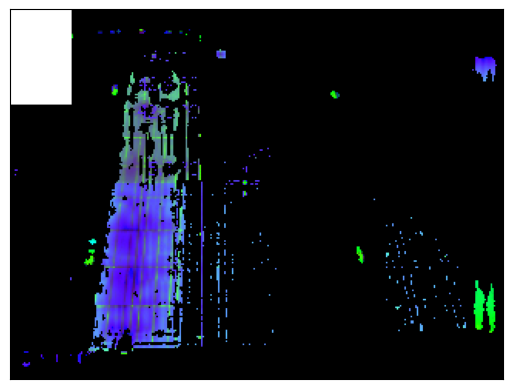

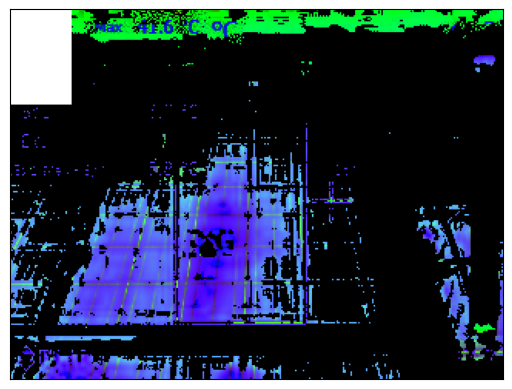

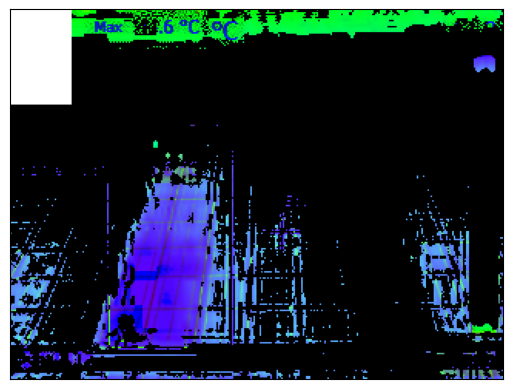

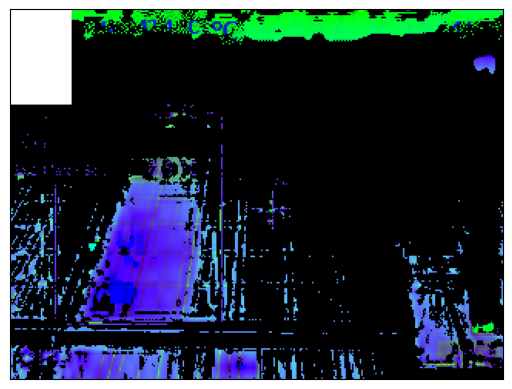

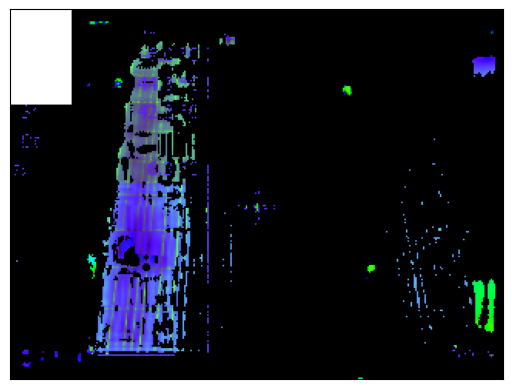

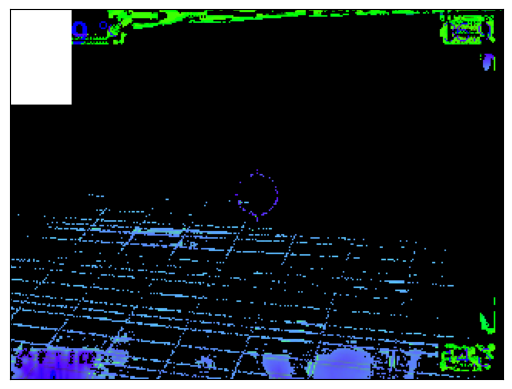

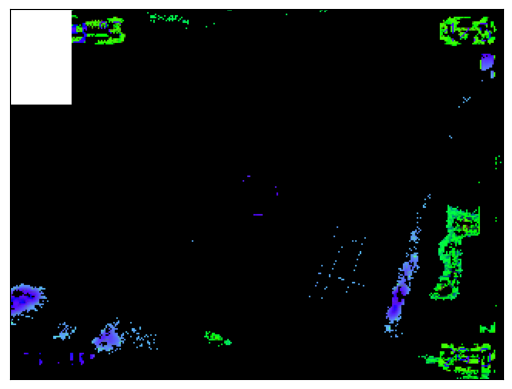

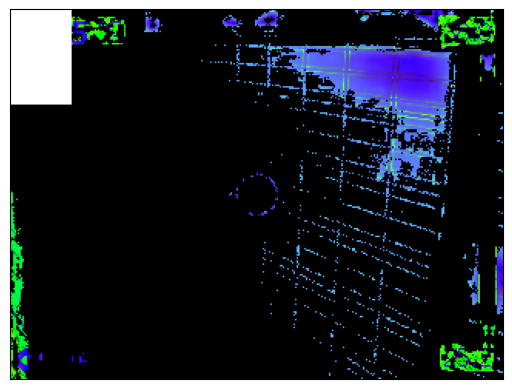

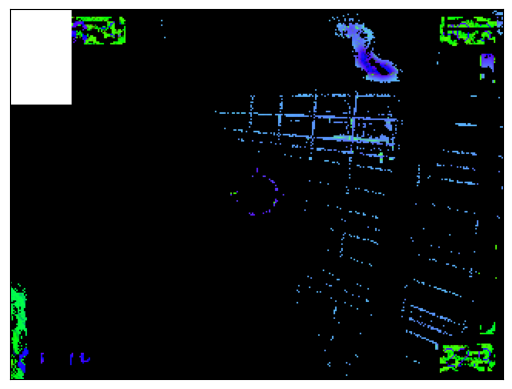

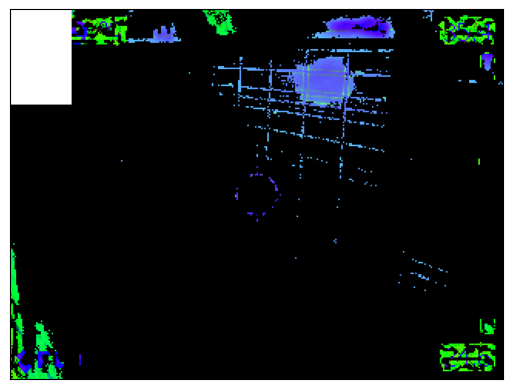

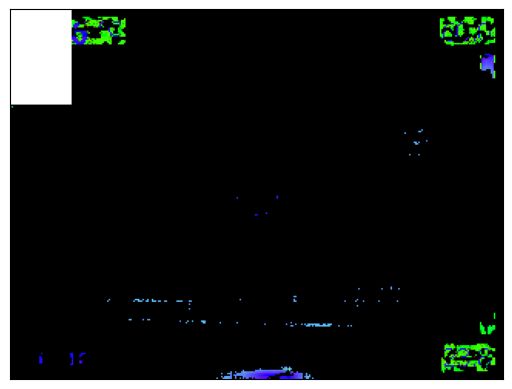

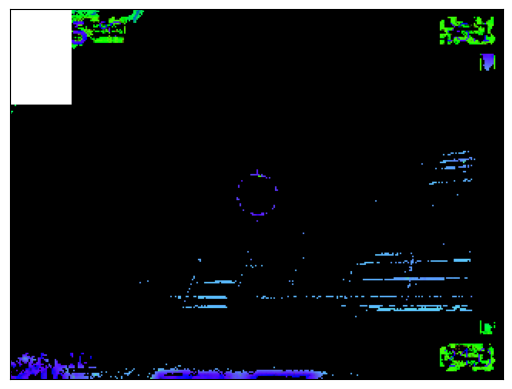

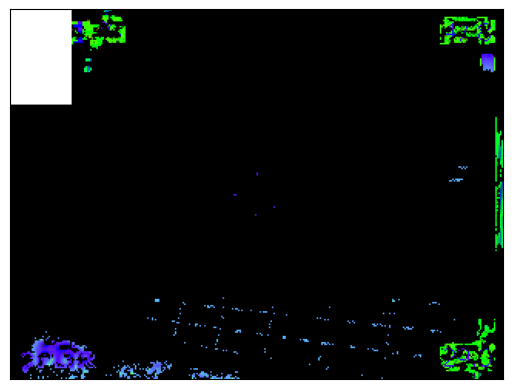

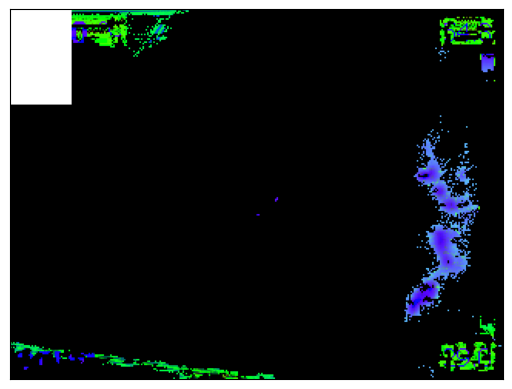

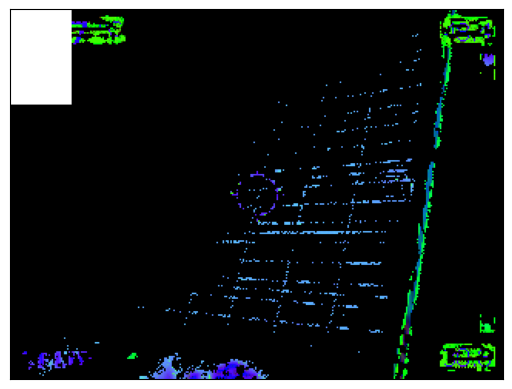

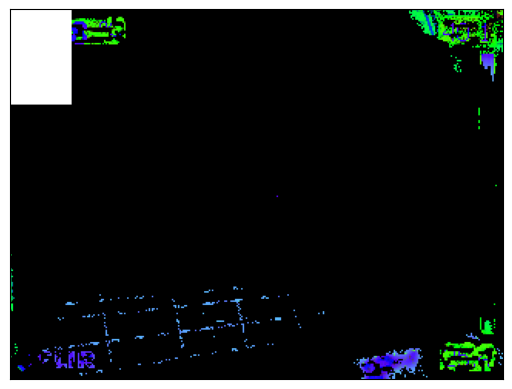

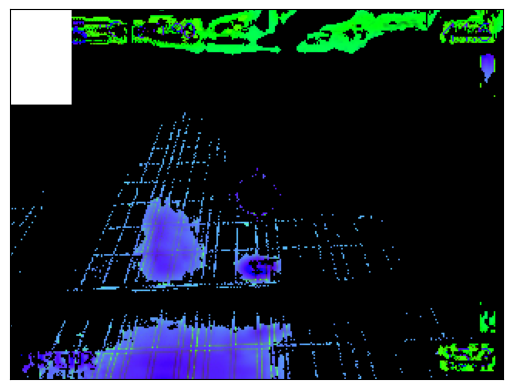

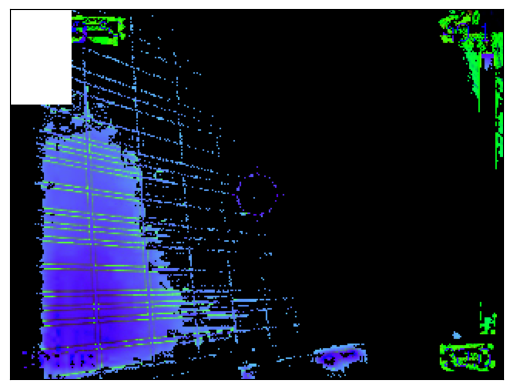

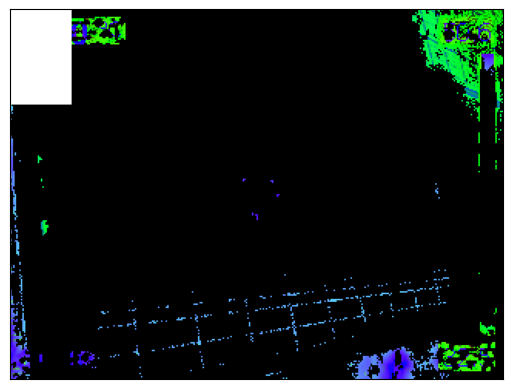

In [10]:
def croppanel(panel):

    img=cv2.cvtColor(panel, cv2.COLOR_RGB2HSV)

    
    lower_color = np.array([0,0,0])
    upper_color = np.array([91,255,255])

    mask = cv2.inRange(img, lower_color, upper_color)

    segmented = cv2.bitwise_and(img, img, mask=mask)
    
    img_arr = np.array(segmented)
    img_arr[ 0 : 62,0 : 40] = (255,255,255)
    img_arr[270:320,0 :40] = (255,255,255)
    img_arr[306:320,0 :235] = (255,255,255)
    img_arr[ 280:320,200:235] = (255,255,255)
    imgw = Image.fromarray(img_arr)
      

    return imgw

results = [croppanel(panel) for panel in poi]


for i in range(len(poi)):
#     plt.subplot(1, 2, 1)

#     fig = plt.imshow(poi2[i])
#     fig.axes.get_xaxis().set_visible(False)
#     fig.axes.get_yaxis().set_visible(False)
#     plt.subplot(1, 2, 2)
    fig2 = plt.imshow(results[i])
    fig2.axes.get_xaxis().set_visible(False)
    fig2.axes.get_yaxis().set_visible(False)
    plt.savefig( str(i) +"s.jpg")
    plt.show()

# Extracting the required area from the mask

In [14]:
import os
directory2 = r'C:\Users\paart\DL_IA'
os.chdir(directory2)
directory3 = r'C:\Users\paart\DL_IA\thermal\blue'
for i in range(len(iml)):
    filename= str(i) + "s.jpg"
    frame = cv2.imread(filename)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red = np.array([88,90,200])
    upper_red = np.array([255,255,255])

    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)
        
    os.chdir(directory3)
    cv2.imwrite(str(i) + "blue.jpg",res)
    os.chdir(directory2)







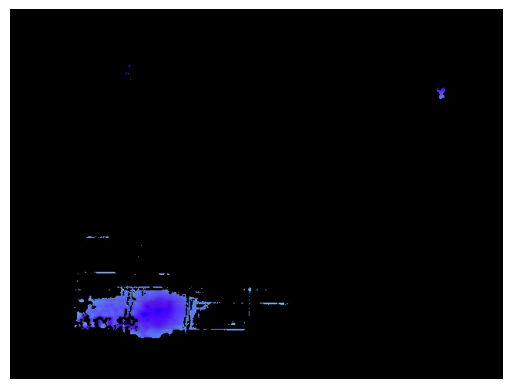

In [15]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image from file
img = mpimg.imread( r'C:\Users\paart\DL_IA\thermal\blue\0blue.jpg')

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()


# Thresholding the masked Image

In [16]:

# simple thresholding type on an image
	
# organizing imports
import cv2
import numpy as np
import os

directory = r'C:\Users\paart\DL_IA\thermal'
directory2 = r'C:\Users\paart\DL_IA'
directory3 = r'C:\Users\paart\DL_IA\thermal\blue'


os.chdir(directory3)

for i in range(len(iml)):
    x = iml[i]
    filename= str(i) + "blue.jpg"
    image1 = cv2.imread(filename)
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
    os.chdir(directory)
    cv2.imwrite( x + ".jpg",thresh1)
    os.chdir(directory3)

    
    
    




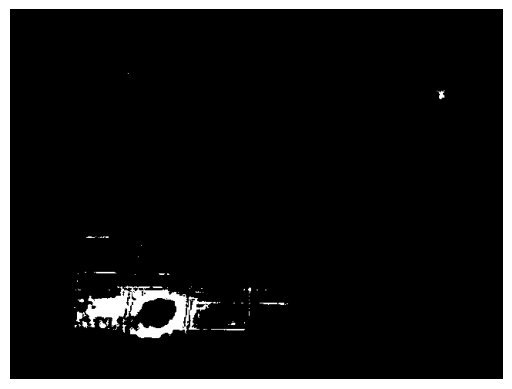

In [17]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image from file
img = mpimg.imread( r'C:\Users\paart\DL_IA\Thresholded\0thres.jpg')

# Display image
plt.imshow(img, cmap = 'gray')
plt.axis('off')
plt.show()


In [18]:
directory4 = r'C:\Users\paart\DL_IA\thermal\blue'
for i in range(len(iml)):
    os.chdir(directory3)
    filename= str(i) + "blue.jpg"
    image1 = cv2.imread(filename)
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)
    os.chdir(directory4)
    cv2.imwrite( str(i) + ".jpg",thresh1)
    
    contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)




# Building A model with Transfer learning

In [20]:
directory = r'C:\Users\paart\DL_IA'
os.chdir(directory)

In [21]:
directory = ['Thresholded']
train_images = []
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        train_images.append(f)

In [22]:
directory = ['Valid']
val_images = []
for i in directory:
    for filename in os.listdir(i):
        f = os.path.join(i, filename)
        val_images.append(f)

# Drawing The Bounding Box

In [45]:
import os
import cv2

# Directories
directory5 = r'C:\Users\paart\DL_IA\Thresholded'
directory6 = r'C:\Users\paart\DL_IA\BB'

# Ensure the directories exist, create them if necessary
os.makedirs(directory6, exist_ok=True)

# Lists to store bounding box coordinates
xmin = []
ymin = []
xmax = []
ymax = []

for i in range(len(train_images)):
    os.chdir(directory5)
    filename = str(i) + "thres.jpg"

    # Load the image and verify if it was loaded successfully
    img = cv2.imread(filename)

    if img is None:
        print(f"Error: Could not read image at {filename}")
        continue  # Skip to the next image

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to create a binary image
    _, thresh = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY)

    # Find the contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize bounding box coordinates
    x, y, w, h = cv2.boundingRect(contours[0])

    for contour in contours[1:]:
        # Calculate the bounding box for each contour
        rect = cv2.boundingRect(contour)
        x = min(x, rect[0])
        y = min(y, rect[1])
        w = max(w, rect[0] + rect[2])
        h = max(h, rect[1] + rect[3])

    # Draw the bounding box around all the contours
    cv2.rectangle(img, (x, y), (x + w - 100, y + h - 100), (0, 0, 255), 2)

    # Append bounding box coordinates to the lists
    xmin.append(x)
    ymin.append(y)
    xmax.append(x + w)
    ymax.append(y + h)

    # Save the image with the bounding box to the output directory
    os.chdir(directory6)
    cv2.imwrite(str(i) + 'BB.jpg', img)


Error: Could not read image at 100thres.jpg
Error: Could not read image at 101thres.jpg
Error: Could not read image at 102thres.jpg
Error: Could not read image at 103thres.jpg
Error: Could not read image at 104thres.jpg
Error: Could not read image at 105thres.jpg
Error: Could not read image at 106thres.jpg
Error: Could not read image at 107thres.jpg
Error: Could not read image at 108thres.jpg
Error: Could not read image at 109thres.jpg
Error: Could not read image at 110thres.jpg
Error: Could not read image at 111thres.jpg
Error: Could not read image at 112thres.jpg
Error: Could not read image at 113thres.jpg
Error: Could not read image at 114thres.jpg
Error: Could not read image at 115thres.jpg
Error: Could not read image at 116thres.jpg
Error: Could not read image at 117thres.jpg
Error: Could not read image at 118thres.jpg
Error: Could not read image at 119thres.jpg
Error: Could not read image at 120thres.jpg
Error: Could not read image at 121thres.jpg
Error: Could not read image at 1

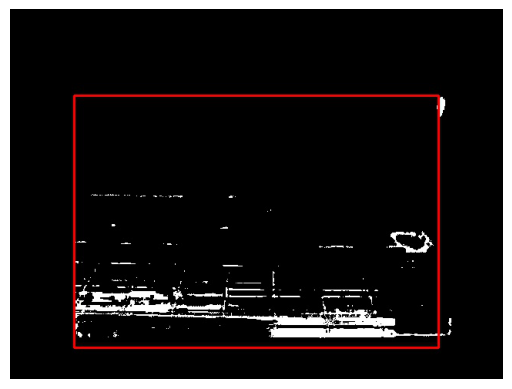

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load image from file
img = mpimg.imread( r'C:\Users\paart\DL_IA\BB\1BB.jpg')

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()


# Getting the coordinates from the Bounding  box

In [47]:
print(xmin)
print(ymin)
print(xmax)
print(ymax)

[83, 83, 106, 103, 90, 89, 95, 83, 126, 83, 84, 104, 83, 88, 83, 83, 85, 83, 341, 84, 83, 85, 104, 83, 83, 96, 83, 83, 83, 86, 85, 89, 89, 83, 88, 83, 114, 317, 83, 91, 147, 84, 96, 91, 96, 149, 83, 116, 96, 85, 84, 113, 83, 84, 90, 146, 200, 127, 130, 150, 292, 151, 154, 152, 92, 91, 83, 83, 86, 149, 84, 93, 115, 97, 120, 83, 84, 83, 114, 85, 93, 162, 83, 83, 83, 161, 83, 83, 217, 322, 154, 210, 92, 95, 143, 110, 92, 96, 110, 84]
[83, 112, 75, 75, 111, 105, 82, 88, 105, 72, 70, 106, 109, 70, 105, 111, 106, 72, 106, 88, 106, 76, 81, 83, 76, 103, 80, 76, 88, 84, 77, 109, 105, 83, 91, 80, 80, 106, 80, 105, 89, 79, 78, 81, 83, 70, 103, 89, 78, 76, 106, 76, 69, 105, 78, 82, 83, 103, 102, 78, 105, 61, 75, 81, 107, 78, 88, 75, 77, 91, 103, 76, 106, 73, 105, 114, 72, 108, 110, 71, 115, 99, 74, 69, 69, 112, 85, 77, 59, 60, 63, 107, 81, 106, 76, 83, 106, 88, 73, 107]
[647, 656, 671, 668, 655, 653, 660, 647, 689, 647, 649, 669, 649, 653, 647, 657, 650, 648, 905, 649, 657, 650, 669, 648, 655, 661

# Exporting Data to Excel

In [48]:
import openpyxl

# Create a new Excel workbook
workbook = openpyxl.Workbook()

# Select the active worksheet
worksheet = workbook.active

# Define a list to write to the Excel file

# Loop through the list and write each element to a new row in column A
for index, element in enumerate(xmin):
    row = index + 1
    worksheet.cell(row=row, column=1, value=element)
    
for index, element in enumerate(ymin):
    row = index + 1
    worksheet.cell(row=row, column=2, value=element)
    
for index, element in enumerate(xmax):
    row = index + 1
    worksheet.cell(row=row, column=3, value=element)
    
for index, element in enumerate(xmax):
    row = index + 1
    worksheet.cell(row=row, column=4, value=element)

# Save the Excel file
workbook.save('my_excel_file.xlsx')


# Importing Data from excel

In [53]:
import pandas as pd
os.chdir(directory6)

# Read data from the Excel file
df = pd.read_excel('BBcoordinates.xlsx', sheet_name='Sheet1', usecols=['x', 'y', 'width', 'height'])

# Get the values from each column as a list
x_data = df['x'].tolist()
y_data = df['y'].tolist()
w_data = df['width'].tolist()
h_data = df['height'].tolist()




# Calculating IOU

In [54]:
def calculate_iou(gt_xmin, gt_ymin, gt_xmax, gt_ymax, pred_xmin, pred_ymin, pred_xmax, pred_ymax):
    # Calculate the coordinates of the intersection rectangle
    x_left = max(gt_xmin, pred_xmin)
    y_top = max(gt_ymin, pred_ymin)
    x_right = min(gt_xmax, pred_xmax)
    y_bottom = min(gt_ymax, pred_ymax)

    # Calculate the area of the intersection rectangle
    if x_right < x_left or y_bottom < y_top:
        intersection_area = 0
    else:
        intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Calculate the area of the ground truth and predicted bounding boxes
    gt_area = (gt_xmax - gt_xmin) * (gt_ymax - gt_ymin)
    pred_area = (pred_xmax - pred_xmin) * (pred_ymax - pred_ymin)

    # Calculate the union area by adding the areas of the two bounding boxes and subtracting the intersection area
    union_area = gt_area + pred_area - intersection_area

    # Calculate the IoU
    iou = intersection_area / union_area

    return iou

# Example usage
gt_xmin = x_data
gt_ymin = y_data
gt_xmax = h_data
gt_ymax = w_data
pred_xmin = xmin
pred_ymin = ymin
pred_xmax = xmax
pred_ymax = ymax

for i in range(len(gt_xmin)):
    iou = calculate_iou(gt_xmin[i], gt_ymin[i], gt_xmax[i], gt_ymax[i], pred_xmin[i], pred_ymin[i], pred_xmax[i], pred_ymax[i])
    print('IoU for bounding box', i+1, ':', iou)


IoU for bounding box 1 : 0.1794562566674167
IoU for bounding box 2 : 0.217424436039821
IoU for bounding box 3 : 0.005366195595496045
IoU for bounding box 4 : 0.3360821452179335
IoU for bounding box 5 : 0.050573738469956914
IoU for bounding box 6 : 0.17087330856689498
IoU for bounding box 7 : 0.0
IoU for bounding box 8 : 0.0036425536863894377
IoU for bounding box 9 : 0.0
IoU for bounding box 10 : 0.000590842919244478
IoU for bounding box 11 : 0.0
IoU for bounding box 12 : 0.0
IoU for bounding box 13 : 0.0
IoU for bounding box 14 : 0.0
IoU for bounding box 15 : 0.1329028086926866
IoU for bounding box 16 : 0.0
IoU for bounding box 17 : 0.00044065652755104527
IoU for bounding box 18 : 0.0007462897677482512
IoU for bounding box 19 : 0.0
IoU for bounding box 20 : 0.02975793559883797
IoU for bounding box 21 : 0.0
IoU for bounding box 22 : 0.0008391971087131496
IoU for bounding box 23 : 0.0
IoU for bounding box 24 : 0.0
IoU for bounding box 25 : 0.0021860523137606116
IoU for bounding box 26 : 